In [300]:
# Imports
from time import time
import matplotlib.pyplot as plt
import math


# WE WILL ONLY CHOOSE EVEN 'N' FOR THE PLOTS

### [IMPORTANT] First run all the cells (Even with erros), to have acces to all the functions,
#---------------> they were organized in an interactive way *_*
#---------------> then you can test each one of the cell :)

''' As of day, Dec 2021, the better option is to use methods from "secrets" module. You don't need to set such seed anymore.
Sample Code:
import secrets
print (secrets.randbelow(1_000_000_000)) 

'''

' As of day, Dec 2021, the better option is to use methods from "secrets" module. You don\'t need to set such seed anymore.\nSample Code:\nimport secrets\nprint (secrets.randbelow(1_000_000_000)) \n\n'

In [12]:
def generate_random_number(_range):
    '''Generates a number from 0 up to _range(modulo)'''
    return (int(time() * 1103515245 + 12345)) % (_range+1)

In [208]:
def generator():
    i = 0
    while True:
        yield i
        i +=1

def get_list_of_distincts_random_numbers(number_of_elements, _range):
    ''' Generates a list of n distincts random numbers'''
    if number_of_elements > _range:
        # It would run infinitely
        raise ValueError("Wrong data")
        
    lis = set()
    for num in generator():
        lis.add(generate_random_number(_range))
        if len(lis) >= number_of_elements:
            break
    
    return list(lis)

def get_list_of_random_numbers(number_of_elements, _range):
    ''' Generates a list of n random numbers'''        
    lis = []
    for num in generator():
        n = generate_random_number(_range)
        if lis and lis[-1] == n:
            continue
            
        lis.append(n)
        if len(lis) >= number_of_elements:
            break
    
    return lis

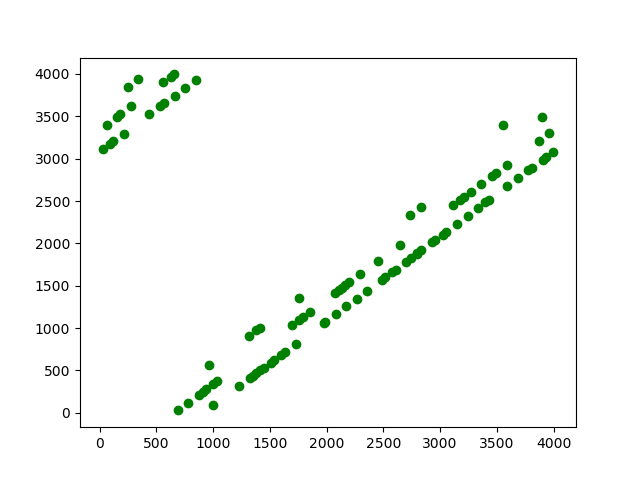

Effiency: 96%
Cycle Length:  173
Full period?  Not


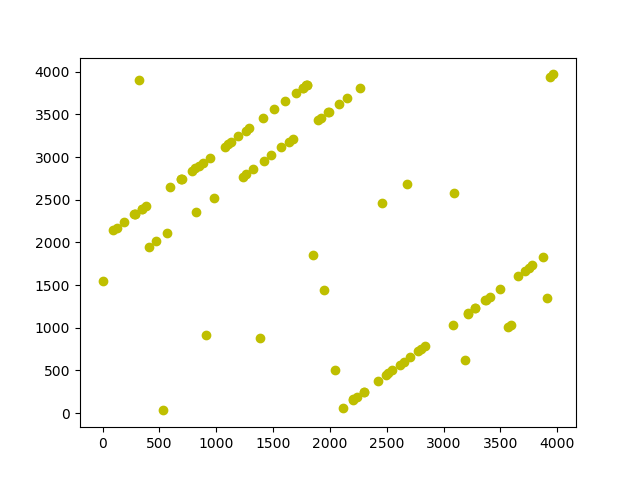

Effiency: 100%
Cycle Length:  200
Full period?  Yes



In [304]:
''' Example of use of our built Random number generator '''

lis = get_list_of_random_numbers(200, 4000)
dlis = get_list_of_distincts_random_numbers(200, 4000)

''' Plot and give the info of the first generated list '''
plt.plot(lis[::2], lis[1::2], 'go')
plt.show()

''' Generating information '''
info = get_info(lis, None)
print_info(info)
print()

''' Plot and give the info of the second generated list (with distinct elements)'''
plt.plot(dlis[::2], dlis[1::2], 'yo')
plt.show()

''' Generating information '''
info = get_info(dlis, None)
print_info(info)
print()

print()

In [278]:
# x = seed number
# c = constant
# a = previous
# m = modulo
# n = How many numbers

def lcg(X, a, c, m):
    return (a*X + c) % m

def get_lcg_list_long(x, a, c, m, n):
    results = []
    for i in range(n):
        x = lcg(x, a, c, m)
        results.append(x)
    return results

def get_lcg_list(param: dict(), n: int):
    if param == None:
        raise ValueError('Wrong data!')
        
    results = []
    x, a, c, m = param['x'], param['a'], param['c'], param['m']
    
    for i in range(n):
        x = lcg(x, a, c, m)
        results.append(x)
    return results

In [227]:
def factor(n):
    lis = []
    c = 2
    while(n > 1):
        if(n % c == 0):
            lis.append(c)
            while n % c == 0:
                n = n / c
        else:
            c = c + 1
    return lis

def is_multiple_of_all_factor(a, n):
    lis = factor(n)
    for i in lis:
        if a % i != 0:
            return False
    return True

def division_holds(a, m):
    return a%4==0 and m%4==0 or a%4!=0 and m%4!=0

def get_good_parameters(n:int, lims:dict()):
    ''' Generate parameters 'a', 'c', 'm', based on the Hull-Dobell Theorem ''' 
    
    
    res = [{'a': 0, 'c': 0, 'm': 0}]
    res.pop()
    
    if lims == None:
        m_start, m_end = 99, 100
        a_start, a_end = 1, 100
        c_start, c_end = 1, 100
        m_steps = 1
    else:
        m_start, m_end = lims['m'][0], lims['m'][1]
        a_start, a_end = lims['a'][0], lims['a'][1]
        c_start, c_end = lims['c'][0], lims['c'][1]
        m_steps = lims.get('steps', 1)
            
    for m in range(m_start,m_end, m_steps):
        for a in range(a_start, a_end):
            for c in range(c_start, c_end):
                if math.gcd(c, m) == 1 and is_multiple_of_all_factor(a-1, m) and division_holds(a-1, m):
                    res.append({'a': a, 'c': c, 'm': m})
                    n -= 1
                if n == 0:
                    return res
                           
            
    return res    

In [256]:

def get_cycle_length(lis):
    ''' Gives the index where the first duplication is encountered 
    
        recall: a sequence start cycling whenever we a repeated number in the progression
    '''
    
    new_lis = []
    
    for i in lis:
        if i in new_lis:
            break
        new_lis.append(i)
    return len(new_lis)
    
def get_info(lis, lcg:None):
    ''' Generates a dictionary with basic information about our given list '''
    
    slis = set(lis)
    lis_len = len(lis)
    set_len = len(slis)
    efficiency = int(set_len / lis_len * 100)
    
    if efficiency == 100:
        cycle_length = lis_len
    else:
        cycle_length = get_cycle_length(lis)
    
    info = {'lcg': lcg,
            'list': lis,
            'efficiency': efficiency,
            'cycle_length': cycle_length,
            'full_period':'Yes' if efficiency == 100 else 'Not'
           }
    
    return info
    
def print_info(info:dict):
    if info['lcg'] != None:
        a = info['lcg']['a']
        c = info['lcg']['c']
        m = info['lcg']['m']
        print('a = ', a, '\nc = ', c, '\nm = ', m)
        
    print('Effiency: ', info['efficiency'], '%', sep='')
    print('Cycle Length: ', info['cycle_length'])
    print('Full period? ', info['full_period'], end='')

    

[{'a': 7, 'c': 1, 'm': 54}, {'a': 7, 'c': 5, 'm': 54}]


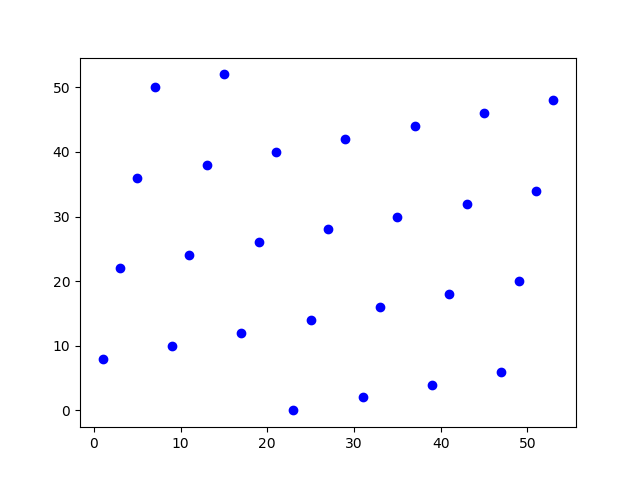

a =  7 
c =  1 
m =  54
Effiency: 100%
Cycle Length:  54
Full period?  Yes


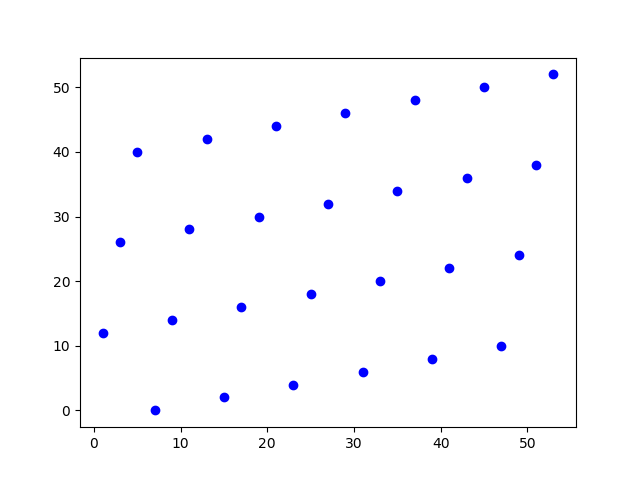

a =  7 
c =  5 
m =  54
Effiency: 100%
Cycle Length:  54
Full period?  Yes


In [307]:
# Example of use

lims = {
        'a': [5, 10],
        'c': [1, 10],
        'm': [50, 100],
        'steps': 2
}

''' Getting a list of 'n' good parameters '''
# params = get_good_parameters(3, None)
params = get_good_parameters(2, lims)
print(params)

for i in params:
    p = i
    p['x'] = 0
    lis = get_lcg_list(p, p['m'])
    
    ''' ploting the graph '''
    
    # the length of the list cannot be odd
    if not len(lis) & 1:
        plt.plot(lis[::2],lis[1::2], 'bo')
        plt.show()
        
        ''' Generating information '''
        info = get_info(lis, p)
        print_info(info)
        print()
   
    
    
#print(lis)

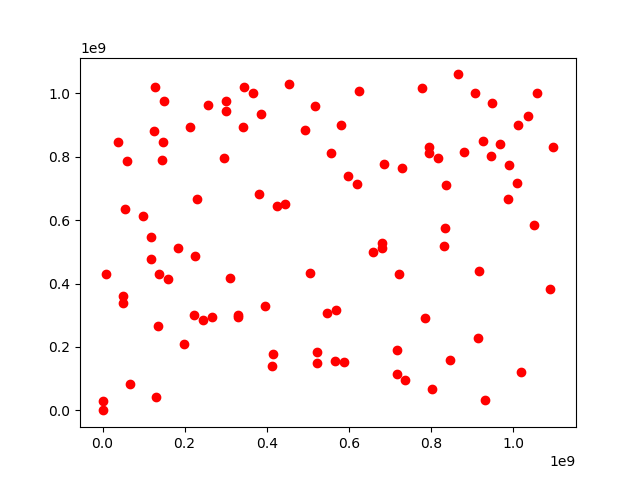

Effiency: 100%
Cycle Length:  200
Full period?  Yes


In [314]:
''' Long numbers for the value of 'm', are more likely to have full Cycle, when few numbers 'n' are needed '''

params = {
        'x': 3,
        'a': 51,
        'c': 70,
        'm': 1103515245,
}

# n -> how many numbers (chosen)
n = 200
lis = get_lcg_list(params, n)


plt.plot(lis[::2], lis[1::2], 'ro')
plt.show()

''' Generating information '''
info = get_info(lis, None)
print_info(info)
print()
   
    

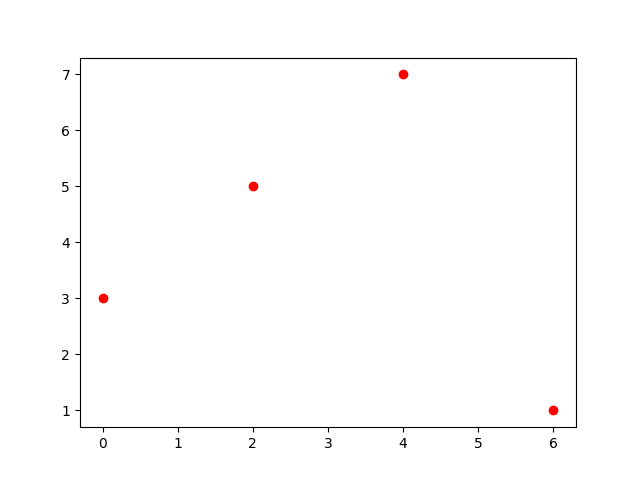

Effiency: 100%
Cycle Length:  8
Full period?  Yes
[0, 3, 2, 5, 4, 7, 6, 1]



In [296]:
''' Example : (LCG Full Period Conditions)  

    m = 8 , a = 5 , c= 1
'''

lis = get_lcg_list_long(1, 5, 3, 8, 8)
plt.plot(lis[::2], lis[1::2], 'ro')
plt.show()

''' Generating information '''
info = get_info(lis, None)
print_info(info)
print()
print(lis)
print()

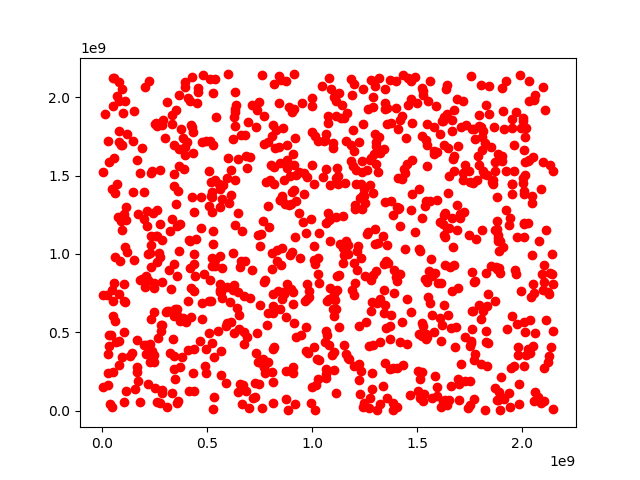

Effiency: 100%
Cycle Length:  2000
Full period?  Yes


In [318]:
''' Example : glibc (used by GCC)

    m = 2^31, a = 1103515245 , c = 12345
    
    seed = 3 (chosen)
    n = 2000 (chosen)
'''

params = {
        'x': 3,
        'a': 1103515245,
        'c': 12345,
        'm': 2**31,
}

# n -> how many numbers (chosen)
n = 2000
lis = get_lcg_list(params, n)


plt.plot(lis[::2], lis[1::2], 'ro')
plt.show()

''' Generating information '''
info = get_info(lis, None)
print_info(info)
print()
   

In [1]:
''' Example : Java's java.util.Random

    m = 2^48, a = 25214903917 , c = 11
    seed = 3 (chosen)
    n = 20000 (chosen)
'''


params = {
        'x': 3,
        'a': 25214903917,
        'c': 11,
        'm': 2**48,
}

# n -> how many numbers (chosen)
n = 2000
lis = get_lcg_list(params, n)


plt.plot(lis[::2], lis[1::2], 'go')
plt.show()

''' Generating information '''
info = get_info(lis, None)
print_info(info)
print()
   

NameError: name 'get_lcg_list' is not defined